In [2]:
import cv2
import skimage.io
import skimage.feature
import skimage.color
import skimage.transform
import skimage.util
import skimage.segmentation
import numpy as np
from skimage.segmentation import mark_boundaries

import imutils

import matplotlib.pyplot as plt

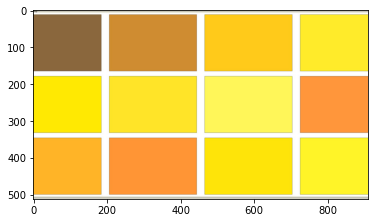

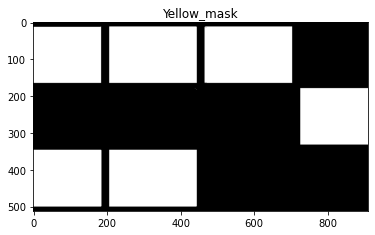

In [5]:
emo = cv2.imread('test_y.jpg')
nemo = cv2.cvtColor(emo, cv2.COLOR_BGR2RGB)

plt.imshow(nemo)
plt.show()

hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
light_red =(0, 110, 20)
dark_red = (24, 255, 255)


yellow_mask = cv2.inRange(hsv_nemo, light_red, dark_red)
plt.title("Yellow_mask")
plt.imshow(yellow_mask, cmap="gray")

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def RYBfilters(path):
    nemo = cv2.imread(path)
    nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)

    hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
    light_red1 =(0, 50, 20)
    dark_red1 = (10, 255, 255)
    
    light_red2 =(160, 45, 20)
    dark_red2 = (180, 255, 255)


    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    light_blue = (100,100,0)
    dark_blue = (140,255,255)

    light_yellow = (10,  100, 20)
    dark_yellow = (36, 255, 255)
    
    # Denoising the images
    kernel = np.ones((2,2),np.float32)/4
    
    

    red1_mask = cv2.inRange(hsv_nemo, light_red1, dark_red1)
    red2_mask = cv2.inRange(hsv_nemo, light_red2, dark_red2)
    white_mask = cv2.inRange(hsv_nemo, light_white, dark_white)
    blue_mask = cv2.inRange(hsv_nemo, light_blue, dark_blue)
    yellow_mask = cv2.inRange(hsv_nemo, light_yellow, dark_yellow)

    #filt_mask = cv2.GaussianBlur(white_mask, (3,3),0)
    #filt_mask = cv2.medianBlur(blue_mask,3)
    
    
    plt.figure(figsize=(20,20))
    plt.subplot(3, 3, 1)
    plt.title("Original")
    plt.imshow(nemo)
    
    plt.subplot(3, 3, 2)
    plt.title("White_mask / Shade mask")
    plt.imshow(white_mask, cmap="gray")
    
    plt.subplot(3, 3, 3)
    plt.title("Red1_Mask")
    plt.imshow(red1_mask, cmap="gray")
    
    plt.subplot(3, 3, 4)
    plt.title("Red2_Mask")
    plt.imshow(red2_mask, cmap="gray")
    
    plt.subplot(3, 3, 5)
    plt.title("Blue_mask")
    plt.imshow(blue_mask, cmap="gray")
    
    plt.subplot(3, 3, 6)
    plt.title("Yellow_mask")
    plt.imshow(yellow_mask, cmap="gray")
    

    im_mask = skimage.segmentation.felzenszwalb(
            skimage.util.img_as_float(nemo), scale=700, sigma= 0.9,
            min_size= 50)



    #####
    white_img  = np.zeros(nemo.shape,dtype=np.uint8)
    white_img.fill(0)
    #####

    bound_img = mark_boundaries(white_img, im_mask)
    plt.subplot(3, 2, 6)
    plt.title("segmentation boundries")
    plt.imshow(bound_img, cmap="gray")

    plt.show()

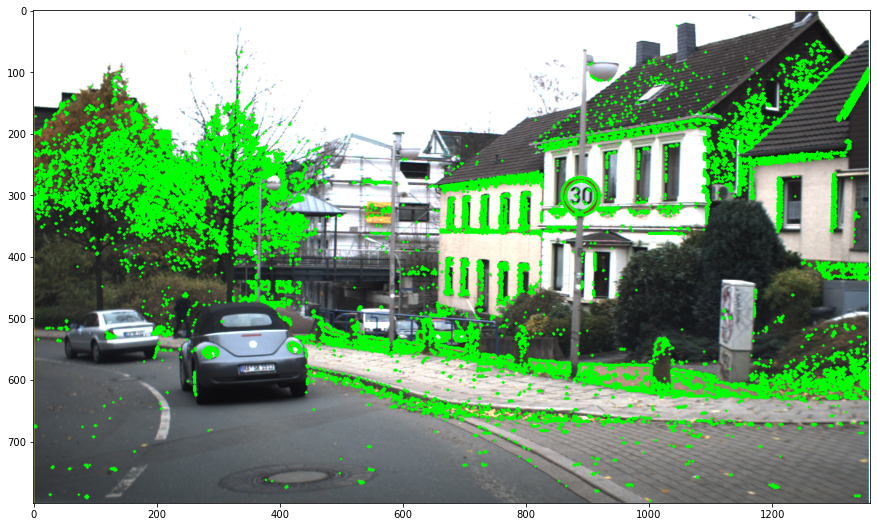

In [8]:
#RYBfilters('TrainIJCNN2013/00219.ppm')
nemo = cv2.imread('TrainIJCNN2013/00225.ppm')
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)

hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
light_red1 =(0, 50, 20)
dark_red1 = (10, 255, 255)

light_red2 =(160, 45, 20)
dark_red2 = (180, 255, 255)


light_white = (0, 0, 200)
dark_white = (145, 60, 255)

light_blue = (100,100,0)
dark_blue = (140,255,255)

light_yellow = (10,  100, 20)
dark_yellow = (36, 255, 255)

# Denoising the images
kernel = np.ones((2,2),np.float32)/4



red1_mask = cv2.inRange(hsv_nemo, light_red1, dark_red1)
red2_mask = cv2.inRange(hsv_nemo, light_red2, dark_red2)
white_mask = cv2.inRange(hsv_nemo, light_white, dark_white)
blue_mask = cv2.inRange(hsv_nemo, light_blue, dark_blue)
yellow_mask = cv2.inRange(hsv_nemo, light_yellow, dark_yellow)
    


ret,thresh = cv2.threshold(red1_mask,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(nemo,contours,-1,(0,255,0),3)
plt.figure(figsize=(15,15))
plt.imshow(nemo)
plt.show()

# Filtering bad contores

In [9]:
def is_contour_good(c):
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # the contour is 'bad' if it is not a rectangle
    return peri > 35

# contour filter for r2 should be differen we should filter less
def is_contour_good_r2(c):
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # the contour is 'bad' if it is not a rectangle
    return peri > 10

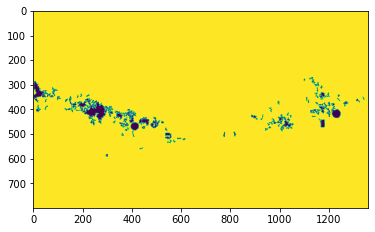

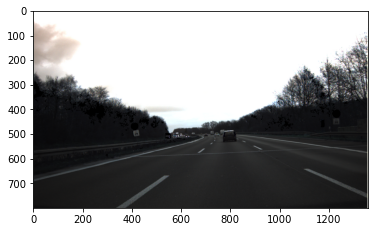

In [10]:
image = cv2.imread('TrainIJCNN2013/00314.ppm')
nemo = image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 100)
plt.imshow(image)

####################
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)

hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
light_red1 =(0, 50, 20)
dark_red1 = (10, 255, 255)

light_red2 =(160, 0, 70)
dark_red2 = (180, 255, 255)


light_white = (0, 0, 200)
dark_white = (145, 60, 255)

light_blue = (100,100,0)
dark_blue = (140,255,255)

light_yellow = (10,  100, 20)
dark_yellow = (36, 255, 255)


red1_mask = cv2.inRange(hsv_nemo, light_red1, dark_red1)
red2_mask = cv2.inRange(hsv_nemo, light_red2, dark_red2)
white_mask = cv2.inRange(hsv_nemo, light_white, dark_white)
blue_mask = cv2.inRange(hsv_nemo, light_blue, dark_blue)
yellow_mask = cv2.inRange(hsv_nemo, light_yellow, dark_yellow)
################

ret,thresh = cv2.threshold(red1_mask,127,255,cv2.THRESH_BINARY)
cnts, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

mask = np.ones(image.shape[:2], dtype="uint8") * 255
# loop over the contours
for c in cnts:
    # if the contour is good, draw it on the mask
    if is_contour_good(c):
         cv2.drawContours(mask, [c], -1, 0, -1)
# remove the contours from the image and show the resulting images
image = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(mask)
plt.show()
plt.imshow(image)

# Drawing bounding boxes around contures

In [20]:
def draw_bound(path):
    image = cv2.imread(path)
    nemo = image
    gray = cv2.cvtColor(nemo, cv2.COLOR_BGR2GRAY)
    edged = cv2.Canny(gray, 50, 100)

    ####################
    nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
    image = nemo

    hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
    light_red1 =(0, 50, 20)
    dark_red1 = (10, 255, 255)

    light_red2 =(160, 45, 20)
    dark_red2 = (180, 255, 255)


    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    light_blue = (100,100,0)
    dark_blue = (140,255,255)

    light_yellow = (10,  100, 20)
    dark_yellow = (36, 255, 255)


    red1_mask = cv2.inRange(hsv_nemo, light_red1, dark_red1)
    red2_mask = cv2.inRange(hsv_nemo, light_red2, dark_red2)
    white_mask = cv2.inRange(hsv_nemo, light_white, dark_white)
    blue_mask = cv2.inRange(hsv_nemo, light_blue, dark_blue)
    yellow_mask = cv2.inRange(hsv_nemo, light_yellow, dark_yellow)
    ################

    ret,thresh = cv2.threshold(red1_mask,127,255,cv2.THRESH_BINARY)
    cnts, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    mask = np.ones(image.shape[:2], dtype="uint8") * 255


    # Approximate contours to polygons + get bounding rects and circles
    contours_poly = [None]*len(cnts)
    boundRect = [None]*len(cnts)
    centers = [None]*len(cnts)
    radius = [None]*len(cnts)


    # loop over the contours
    for i, c in enumerate(cnts):
        # if the contour is good, draw it on the mask (For filtering)
        if is_contour_good:
            cv2.drawContours(mask, [c], -1, 0, -1)
            contours_poly[i] = cv2.approxPolyDP(c, 3, True)
            boundRect[i] = cv2.boundingRect(contours_poly[i])
            centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])

    # remove the contours from the image and show the resulting images
    #image = cv2.bitwise_and(image, image, mask=mask)
    drawing = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    
    # Draw polygonal contour + bonding rects + optionl * circles
    for i in range(len(cnts)):
        color1 = (255,0,0)
        color2 = (255,255,255)
        cv2.drawContours(drawing, contours_poly, i, color1)
        area_of_rec = int(boundRect[i][2]) * int(boundRect[i][3])
        h = int(boundRect[i][2])
        w = int(boundRect[i][3])
        if(area_of_rec >= 500 and w<=3*h and h<=3*w) :
                       cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])),(int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color2, 2)
                       cv2.rectangle(image, (int(boundRect[i][0]), int(boundRect[i][1])),(int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color1, 2)
            #cv2.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
            #cv2.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
        bound_image = image  

    return drawing , mask , bound_image, boundRect

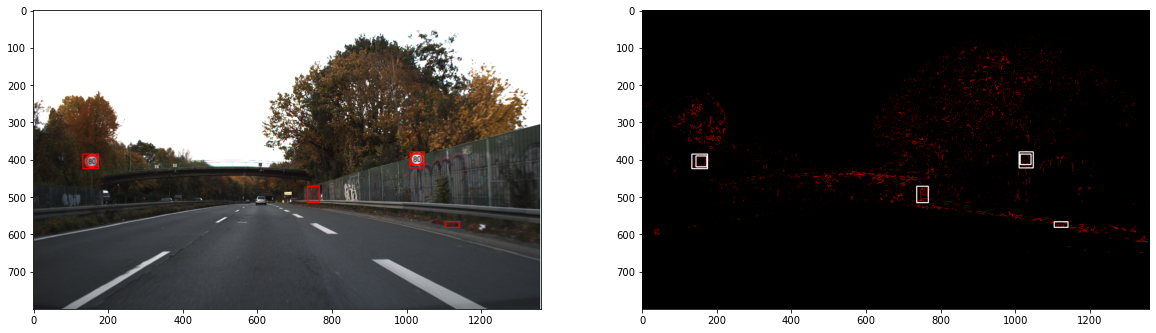

In [21]:
drawing , mask, bound_image, b = draw_bound('TrainIJCNN2013/00127.ppm')    
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.imshow(bound_image)
plt.subplot(1,2,2)
plt.imshow(drawing)